# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html


In [5]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [ ]:
# Create a Beautiful Soup Object


In [9]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data


In [10]:
# Extract column headings
table = soup.find('table', class_='table')

# Extract table data into a list of dictionaries
data = []
for row in table.find_all('tr', class_='data-row'):
    columns = row.find_all('td')
    row_data = [col.get_text() for col in columns]
    data.append(row_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

# Loop through the scraped data to create a list of rows


In [11]:
# Create an empty list to store rows
data_rows = []

# Loop through the table rows and extract data
for row in table.find_all('tr', class_='data-row'):
    columns = row.find_all('td')
    row_data = [col.get_text() for col in columns]
    data_rows.append(row_data)

# Display the list of rows
for row in data_rows:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create a Pandas DataFrame from the extracted data


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the extracted data
df = pd.DataFrame(data_rows, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [19]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [20]:
# Examine the data type of each column
data_types = df.dtypes
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis


In [28]:
# Change data types for specific columns
df['id'] = df['id'].astype(object)  # Convert 'id' to integer
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert 'terrestrial_date' to datetime
df['sol'] = df['sol'].astype('int64')  # Convert 'sol' to integer
df['ls'] = df['ls'].astype('int64')  # Convert 'ls' to integer
df['month'] = df['month'].astype('int64')  # Convert 'month' to integer
df['min_temp'] = df['min_temp'].astype(float)  # Convert 'min_temp' to float
df['pressure'] = df['pressure'].astype(float)  # Convert 'pressure' to float

In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [29]:
# Confirm type changes were successful by examining data types again
data_types = df.dtypes
print(data_types)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [36]:
# How many months exist on Mars?
# Extract the 'month' and 'sol' columns
month_sol_df = df[['month', 'sol']]

# Group the data by 'month' and count the unique 'sol' values for each month
days_per_month = month_sol_df.groupby('month')['sol'].nunique()

# Print the result
print("Days per month on Mars:")
print(days_per_month)

Days per month on Mars:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?


1867

In [37]:
# 2. How many Martian days' worth of data are there?
martian_days_data_count = df['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", martian_days_data_count)

Number of Martian days' worth of data: 1867


In [14]:
# 3. What is the average low temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [38]:
# 3. What is the average low temperature by month?
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group the data by 'month' and calculate the mean of 'min_temp' for each group
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average low temperature by month on Mars:")
print(average_low_temp_by_month)

Average low temperature by month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


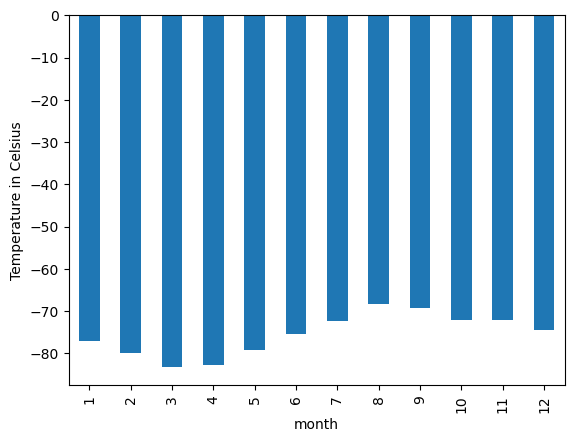

In [15]:
# Plot the average temperature by month


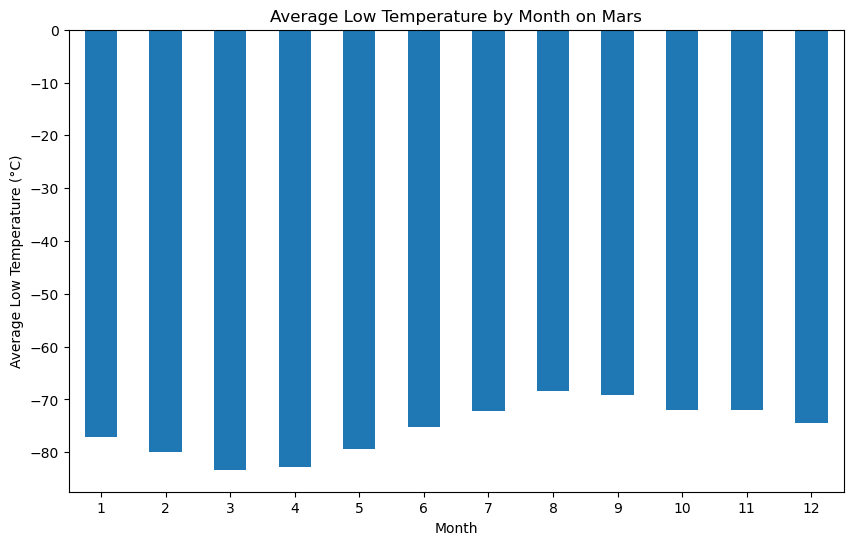

In [40]:
# Plot the average temperature by month
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group the data by 'month' and calculate the mean of 'min_temp' for each group
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Average Low Temperature (°C)')
plt.title('Average Low Temperature by Month on Mars')
plt.xticks(rotation=0)  # Rotates month labels on the x-axis
plt.show()

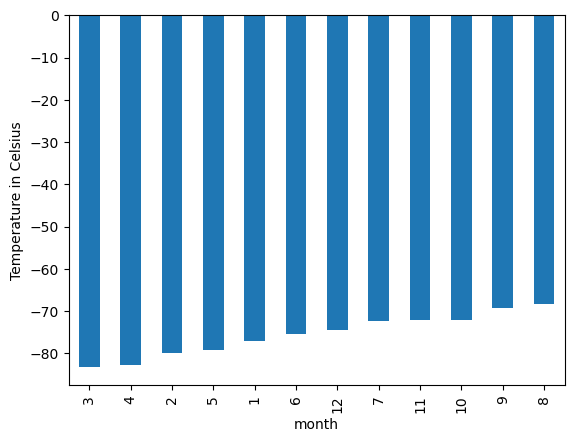

In [16]:
# Identify the coldest and hottest months in Curiosity's location


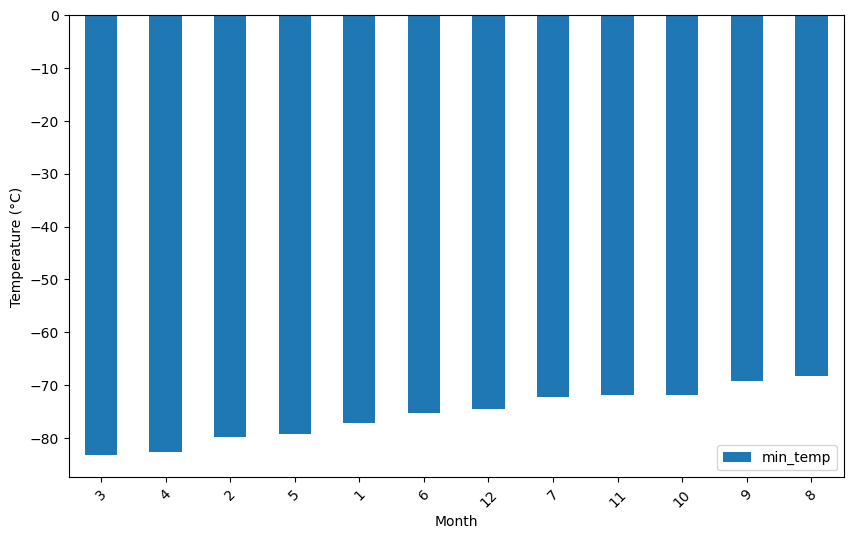

In [47]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest month (minimum average temperature)
coldest_month = average_low_temp_by_month.idxmin()

# Find the hottest month (maximum average temperature)
hottest_month = average_low_temp_by_month.idxmax()

# Sort the months by average temperature in ascending order
average_low_temp_by_month = average_low_temp_by_month.sort_values(ascending=True)

# Create a bar plot with coldest to hottest months from left to right
plt.figure(figsize=(10, 6))
average_low_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Temperature (°C)')
plt.xticks(rotation=45)

plt.legend()  # Show the legend
plt.show()


In [17]:
# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [48]:
# 4. Average pressure by Martian month
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Group the data by 'month' and calculate the mean of 'pressure' for each group
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


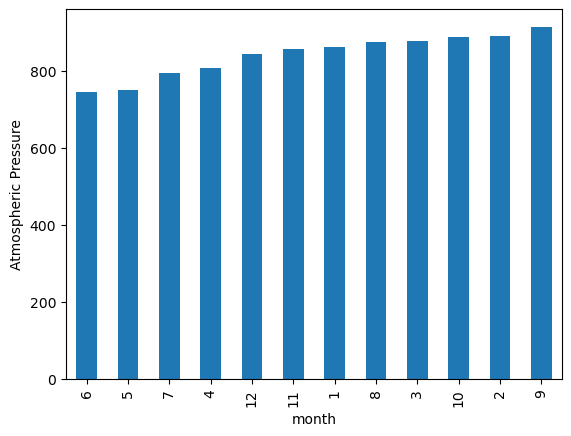

In [18]:
# Plot the average pressure by month


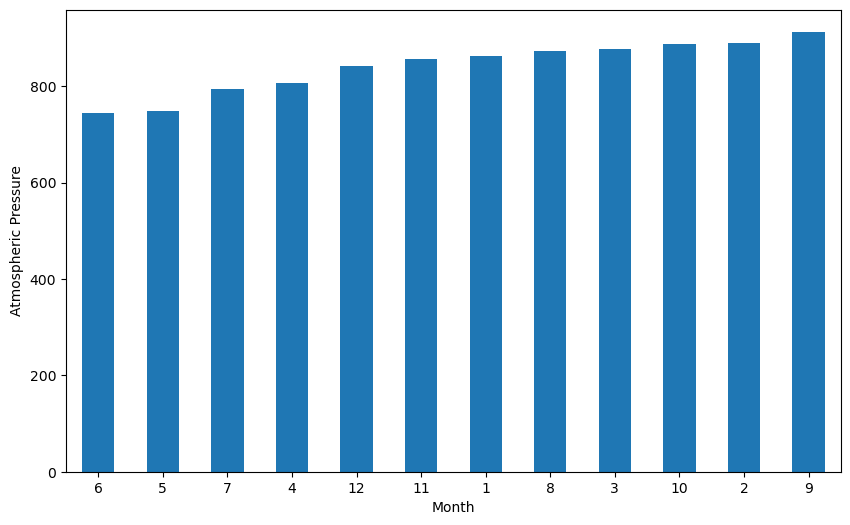

In [50]:
# Plot the average pressure by month
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Group the data by 'month' and calculate the mean of 'pressure' for each group
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the months by average atmospheric pressure in ascending order
average_pressure_by_month = average_pressure_by_month.sort_values(ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure')
plt.xticks(rotation=0)  # Rotates month labels on the x-axis
plt.show()

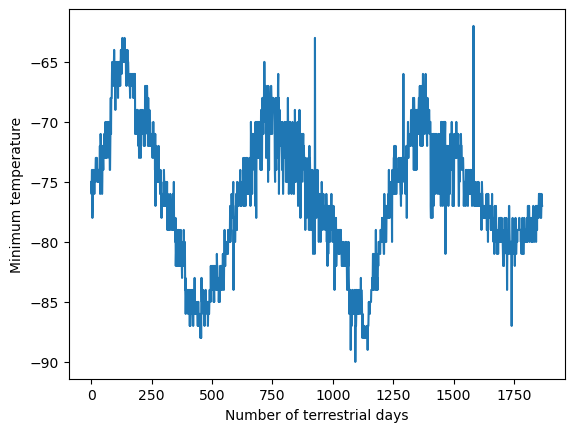

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

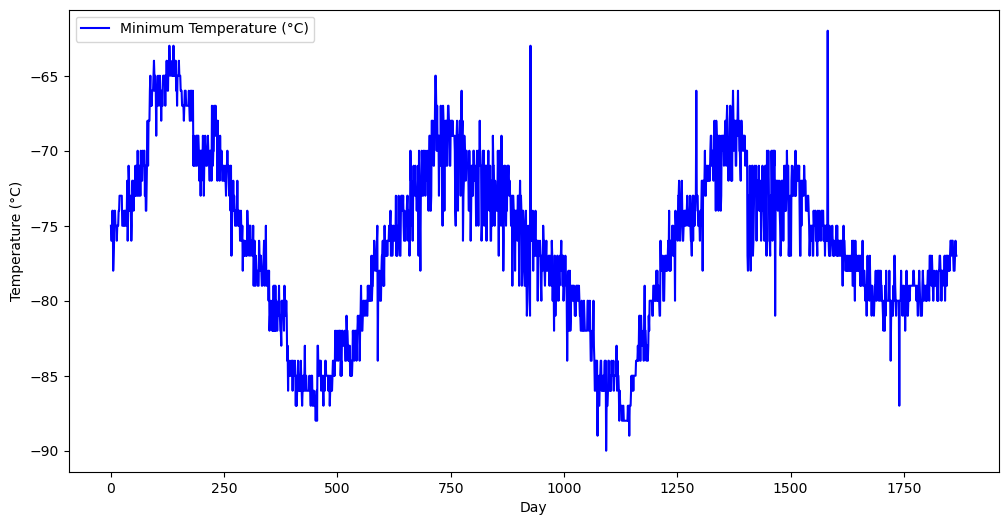

In [53]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['min_temp'], label='Minimum Temperature (°C)', color='blue')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')

plt.legend()
plt.show()




### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV


In [54]:
# Write the data to a CSV
csv_file_path = "mars_temperature_data.csv"

# Use the to_csv method to write the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"Data has been saved to {csv_file_path}")

Data has been saved to mars_temperature_data.csv


In [21]:
browser.quit()